Imports


In [18]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt

#data loading


In [11]:
PROJECT_ROOT = Path.cwd().parent
DATA_RAW = PROJECT_ROOT / "data" / "raw" / "liar"

PROJECT_ROOT, DATA_RAW

train_path = DATA_RAW/"train.csv"
df_train = pd.read_csv(train_path)


In [10]:
list(DATA_RAW.iterdir())

[WindowsPath('c:/Users/Ling Jun/Desktop/PSB/Fact-Checking-Agent/data/raw/liar/test.csv'),
 WindowsPath('c:/Users/Ling Jun/Desktop/PSB/Fact-Checking-Agent/data/raw/liar/train.csv'),
 WindowsPath('c:/Users/Ling Jun/Desktop/PSB/Fact-Checking-Agent/data/raw/liar/valid.csv')]

In [15]:
df_train.head()
df_train.columns

Index(['id', 'label', 'statement', 'date', 'subject', 'speaker',
       'speaker_description', 'state_info', 'true_counts',
       'mostly_true_counts', 'half_true_counts', 'mostly_false_counts',
       'false_counts', 'pants_on_fire_counts', 'context', 'justification'],
      dtype='object')

In [21]:
df = df_train.rename(columns={
    "statement": "claim_text",
    "label": "label_raw"
})

label_map = {
    "true": "true",
    "mostly-true": "true",
    "half-true": "mixed",
    "barely-true": "mixed",
    "false": "false",
    "pants-on-fire": "false",
}

df["label_grouped"] = df["label_raw"].map(label_map)
df["label_grouped"].value_counts()
df[["claim_text", "label_raw"]].head()
df["label_raw"].value_counts()


label_raw
1    5284
3    2967
2    2882
4    2743
0    2425
5    2068
Name: count, dtype: int64

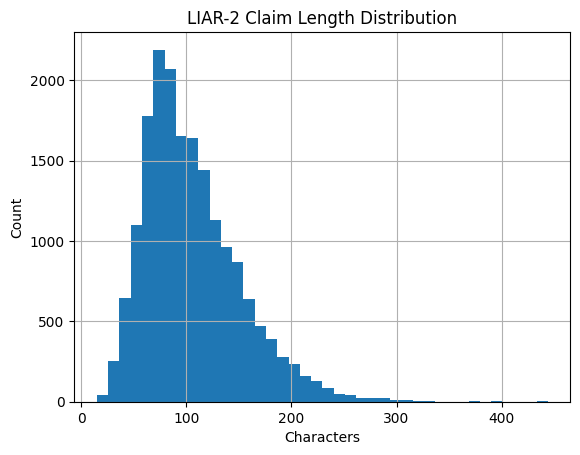

In [ ]:
df["claim_len"] = df["claim_text"].str.len()
df["claim_len"].describe()

df["claim_len"].hist(bins=40)
plt.title("LIAR-2 Claim Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()


In [22]:
from pathlib import Path

DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

df_clean = df[["claim_text", "label_raw", "label_grouped"]].copy()

out_path = DATA_PROCESSED / "liar2_train_clean.parquet"
df_clean.to_parquet(out_path, index=False)

out_path


WindowsPath('c:/Users/Ling Jun/Desktop/PSB/Fact-Checking-Agent/data/processed/liar2_train_clean.parquet')